In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
health_data=pd.read_csv("C:/Users/user/documents/BOAZ/CSA 2025/csa_project/health_data.csv")

In [3]:
health_data.shape

(7257, 28)

In [4]:
health_data.head(1)

,Unnamed: 0,facility_type_name,owner_name,owner_type_name,admission_status_name,county,constituency,ward_name,average_rating,facility_services,...,number_of_hdu_beds,number_of_inpatient_beds,number_of_maternity_beds,number_of_isolation_beds,number_of_general_theatres,number_of_maternity_theatres,number_of_minor_theatres,number_of_eye_theatres,new_born_unit,facility_catchment_population
0,2,Dispensary,Ministry of Health,Ministry of Health,Admitting Maternity Patients Only,Trans Nzoia,Endebess,Endebess,0.0,[],...,0,0,2,0,0,0,0,0,False,5000.0


In [5]:
health_data_clean=health_data.drop(columns=["new_born_unit","admission_status_name","owner_type_name",
                                            "number_of_hdu_beds","number_of_isolation_beds","number_of_general_theatres",
                                            "number_of_maternity_theatres","number_of_minor_theatres","number_of_eye_theatres",
                                            "admission_status_name",
                                            "sub_county_name","number_of_icu_beds","number_of_emergency_casualty_beds","facility_services","facility_infrastructure"],axis=1)	

In [6]:
health_data_clean.shape

(7257, 14)

In [7]:
health_data_clean.isnull().sum()

Unnamed: 0                          0
facility_type_name                  0
owner_name                          0
county                              0
constituency                        0
ward_name                           0
average_rating                      0
keph_level_name                     0
lat_long                          160
number_of_beds                      0
number_of_cots                      0
number_of_inpatient_beds            0
number_of_maternity_beds            0
facility_catchment_population    4180
dtype: int64

In [8]:
health_data_clean.to_csv("C:/Users/user/documents/BOAZ/CSA 2025/csa_project/health_data_clean.csv")

In [9]:
health_data_clean.reset_index(inplace=True)

In [10]:
#health_data_clean.drop(columns=["level_0"],inplace=True)

In [11]:
health_data_clean.head()

,index,Unnamed: 0,facility_type_name,owner_name,county,constituency,ward_name,average_rating,keph_level_name,lat_long,number_of_beds,number_of_cots,number_of_inpatient_beds,number_of_maternity_beds,facility_catchment_population
0,0,2,Dispensary,Ministry of Health,Trans Nzoia,Endebess,Endebess,0.0,Level 2,"[1.02393, 34.77484]",2,0,0,2,5000.0
1,1,3,Dispensary,Ministry of Health,Trans Nzoia,Endebess,Chepchoina,0.0,Level 2,"[1.1351849999999999, 34.806785]",0,0,0,0,6000.0
2,2,4,Dispensary,Ministry of Health,Trans Nzoia,Endebess,Matumbei,0.0,Level 2,"[1.08089, 34.80747]",3,0,0,3,10426.0
3,3,5,Dispensary,Ministry of Health,Trans Nzoia,Endebess,Endebess,0.0,Level 2,"[1.037451, 34.861203]",3,0,0,3,4579.0
4,4,6,Dispensary,Ministry of Health,Trans Nzoia,Endebess,Chepchoina,0.0,Level 2,"[1.2035879999999999, 34.803397]",3,0,0,3,6459.0


In [12]:
health_data_clean.isnull().sum()

index                               0
Unnamed: 0                          0
facility_type_name                  0
owner_name                          0
county                              0
constituency                        0
ward_name                           0
average_rating                      0
keph_level_name                     0
lat_long                          160
number_of_beds                      0
number_of_cots                      0
number_of_inpatient_beds            0
number_of_maternity_beds            0
facility_catchment_population    4180
dtype: int64

In [13]:
health_data_clean.shape

(7257, 15)

In [14]:
median_imputed=health_data_clean["facility_catchment_population"].median()

In [15]:
median_imputed

3220.0

In [16]:
#health_data_clean["facility_catchment_population"]=health_data_clean["facility_catchment_population"].fillna(mean_imputed)

In [17]:
health_data_clean.dropna(inplace=True)

In [18]:
health_data_clean.shape

(3053, 15)

In [19]:
health_data_clean.isnull().sum()

index                            0
Unnamed: 0                       0
facility_type_name               0
owner_name                       0
county                           0
constituency                     0
ward_name                        0
average_rating                   0
keph_level_name                  0
lat_long                         0
number_of_beds                   0
number_of_cots                   0
number_of_inpatient_beds         0
number_of_maternity_beds         0
facility_catchment_population    0
dtype: int64

In [20]:
health_data_clean.describe()

,index,Unnamed: 0,average_rating,number_of_beds,number_of_cots,number_of_inpatient_beds,number_of_maternity_beds,facility_catchment_population
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3.053000e+03
mean,2596.189322,5865.963315,0.027300,5.802489,0.624304,3.744841,1.658041,1.039774e+04
std,1891.934690,3925.570240,0.276839,27.605629,2.795456,95.864478,7.009192,1.010871e+05
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000e+00
25%,885.000000,2596.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+03
50%,2344.000000,5618.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.213000e+03
75%,4134.000000,8824.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.578000e+03
max,7241.000000,16087.000000,5.000000,650.000000,58.000000,5213.000000,139.000000,5.000000e+06


In [21]:
health_data_aggregate = health_data_clean.groupby('county').agg({
    'average_rating': 'mean',   # You could use other functions like sum, median, etc.
    'number_of_beds': 'sum',
    'number_of_cots': 'sum',
    'number_of_inpatient_beds': 'sum',
    'number_of_maternity_beds': 'sum',
    'facility_catchment_population': 'sum',
    'facility_type_name':'count'
}).reset_index()

In [22]:
health_data_aggregate.head()

,county,average_rating,number_of_beds,number_of_cots,number_of_inpatient_beds,number_of_maternity_beds,facility_catchment_population,facility_type_name
0,Baringo,0.003902,284,16,15,19,204309.0,41
1,Bomet,0.012987,157,19,12,71,398032.0,77
2,Bungoma,0.019748,881,67,295,210,1342280.0,129
3,Busia,0.012500,523,1,219,83,243454.0,35
4,Elgeyo Marakwet,0.050000,237,23,2,67,108943.0,25


In [23]:
health_data_aggregate.describe().T

,count,mean,std,min,25%,50%,75%,max
average_rating,47.0,0.032395,4.734431e-02,0.0,0.002393,0.0129,0.034523,1.842105e-01
number_of_beds,47.0,376.914894,3.031966e+02,0.0,136.500000,295.0000,571.000000,1.058000e+03
number_of_cots,47.0,40.553191,3.450949e+01,0.0,17.000000,33.0000,62.000000,1.760000e+02
number_of_inpatient_beds,47.0,243.255319,7.845373e+02,0.0,3.500000,39.0000,154.500000,5.298000e+03
number_of_maternity_beds,47.0,107.702128,9.053823e+01,0.0,33.000000,83.0000,182.000000,3.710000e+02
facility_catchment_population,47.0,675410.723404,1.309159e+06,45055.0,225977.000000,375997.0000,671880.500000,9.024658e+06
facility_type_name,47.0,64.957447,4.089114e+01,12.0,32.500000,54.0000,91.000000,1.920000e+02


In [24]:
health_data_aggregate.rename(columns={"facility_type_name":"no_of_facilities"},inplace=True)

In [25]:
#census_data=pd.read_excel("C:/Users/user/documents/BOAZ/CSA 2025/csa_project/Kenya Population data 2019 census.xlsx")


In [26]:
#census_data.head()

In [27]:
census_data=pd.read_csv("C:/Users/user/documents/BOAZ/CSA 2025/csa_project/census_data.csv")

In [28]:
census_data.head()

,County,Unnamed: 1,Male,Female,Total,Conventional,Group quarters,Persons per Sq. Km,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,MOMBASA,"1,208,333","610,257","598,046","378,422","376,295","2,127","5,495",NaN,NaN,NaN
1,KWALE,"866,820","425,121","441,681","173,176","172,802",374,105,NaN,NaN,NaN
2,KILIFI,"1,453,787","704,089","749,673","298,472","297,990",482,116,NaN,NaN,NaN
3,TANA RIVER,"315,943","158,550","157,391","68,242","66,984","1,258",8,NaN,NaN,NaN
4,LAMU,"143,920","76,103","67,813","37,963","34,231","3,732",23,NaN,NaN,NaN


In [29]:
census_data.head()

,County,Unnamed: 1,Male,Female,Total,Conventional,Group quarters,Persons per Sq. Km,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,MOMBASA,"1,208,333","610,257","598,046","378,422","376,295","2,127","5,495",NaN,NaN,NaN
1,KWALE,"866,820","425,121","441,681","173,176","172,802",374,105,NaN,NaN,NaN
2,KILIFI,"1,453,787","704,089","749,673","298,472","297,990",482,116,NaN,NaN,NaN
3,TANA RIVER,"315,943","158,550","157,391","68,242","66,984","1,258",8,NaN,NaN,NaN
4,LAMU,"143,920","76,103","67,813","37,963","34,231","3,732",23,NaN,NaN,NaN


In [30]:
census_data.rename(columns={"Unnamed: 1":"population_total", "Total":"convention_total","County":"county"},inplace=True)

In [31]:
census_data.head()

,County,population_total,Male,Female,Total,Conventional,Group quarters,Persons per Sq. Km,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,MOMBASA,"1,208,333","610,257","598,046","378,422","376,295","2,127","5,495",NaN,NaN,NaN
1,KWALE,"866,820","425,121","441,681","173,176","172,802",374,105,NaN,NaN,NaN
2,KILIFI,"1,453,787","704,089","749,673","298,472","297,990",482,116,NaN,NaN,NaN
3,TANA RIVER,"315,943","158,550","157,391","68,242","66,984","1,258",8,NaN,NaN,NaN
4,LAMU,"143,920","76,103","67,813","37,963","34,231","3,732",23,NaN,NaN,NaN


In [32]:
# Remove spaces and lowercase all column names
census_data.columns = census_data.columns.str.strip().str.lower()

print(census_data.columns)


Index(['county', 'population_total', 'male', 'female', 'total', 'conventional',
       'group quarters', 'persons per sq. km', 'unnamed: 8', 'unnamed: 9',
       'unnamed: 10'],
      dtype='object')


In [33]:
census_data['county'] = census_data['county'].str.title()


In [34]:
census_data.head()


,county,population_total,male,female,total,conventional,group quarters,persons per sq. km,unnamed: 8,unnamed: 9,unnamed: 10
0,Mombasa,"1,208,333","610,257","598,046","378,422","376,295","2,127","5,495",NaN,NaN,NaN
1,Kwale,"866,820","425,121","441,681","173,176","172,802",374,105,NaN,NaN,NaN
2,Kilifi,"1,453,787","704,089","749,673","298,472","297,990",482,116,NaN,NaN,NaN
3,Tana River,"315,943","158,550","157,391","68,242","66,984","1,258",8,NaN,NaN,NaN
4,Lamu,"143,920","76,103","67,813","37,963","34,231","3,732",23,NaN,NaN,NaN


In [35]:
df_sorted = census_data.sort_values(by='county')

In [36]:
df_sorted.reset_index(inplace=True)

In [37]:
df_sorted.head()

,index,county,population_total,male,female,total,conventional,group quarters,persons per sq. km,unnamed: 8,unnamed: 9,unnamed: 10
0,29,Baringo,"666,763","336,322","330,428","142,518","141,877",641,61,NaN,NaN,NaN
1,35,Bomet,"875,689","434,287","441,379","187,641","187,230",411,349,NaN,NaN,NaN
2,38,Bungoma,"1,670,570","812,146","858,389","358,796","357,714","1,082",552,NaN,NaN,NaN
3,39,Busia,"893,681","426,252","467,401","198,152","197,944",208,526,NaN,NaN,NaN
4,27,Elgeyo/Marakwet,"454,480","227,317","227,151","99,861","99,119",742,150,NaN,NaN,NaN


In [38]:
final_data = pd.concat([df_sorted, health_data_aggregate], axis=1)

In [39]:
final_data.head()

,index,county,population_total,male,female,total,conventional,group quarters,persons per sq. km,unnamed: 8,unnamed: 9,unnamed: 10,county,average_rating,number_of_beds,number_of_cots,number_of_inpatient_beds,number_of_maternity_beds,facility_catchment_population,no_of_facilities
0,29,Baringo,"666,763","336,322","330,428","142,518","141,877",641,61,NaN,NaN,NaN,Baringo,0.003902,284,16,15,19,204309.0,41
1,35,Bomet,"875,689","434,287","441,379","187,641","187,230",411,349,NaN,NaN,NaN,Bomet,0.012987,157,19,12,71,398032.0,77
2,38,Bungoma,"1,670,570","812,146","858,389","358,796","357,714","1,082",552,NaN,NaN,NaN,Bungoma,0.019748,881,67,295,210,1342280.0,129
3,39,Busia,"893,681","426,252","467,401","198,152","197,944",208,526,NaN,NaN,NaN,Busia,0.012500,523,1,219,83,243454.0,35
4,27,Elgeyo/Marakwet,"454,480","227,317","227,151","99,861","99,119",742,150,NaN,NaN,NaN,Elgeyo Marakwet,0.050000,237,23,2,67,108943.0,25


In [40]:
final_data.drop(columns=["unnamed: 8","unnamed: 9","unnamed: 10"], inplace=True)

In [41]:
final_data.head()

,index,county,population_total,male,female,total,conventional,group quarters,persons per sq. km,county,average_rating,number_of_beds,number_of_cots,number_of_inpatient_beds,number_of_maternity_beds,facility_catchment_population,no_of_facilities
0,29,Baringo,"666,763","336,322","330,428","142,518","141,877",641,61,Baringo,0.003902,284,16,15,19,204309.0,41
1,35,Bomet,"875,689","434,287","441,379","187,641","187,230",411,349,Bomet,0.012987,157,19,12,71,398032.0,77
2,38,Bungoma,"1,670,570","812,146","858,389","358,796","357,714","1,082",552,Bungoma,0.019748,881,67,295,210,1342280.0,129
3,39,Busia,"893,681","426,252","467,401","198,152","197,944",208,526,Busia,0.012500,523,1,219,83,243454.0,35
4,27,Elgeyo/Marakwet,"454,480","227,317","227,151","99,861","99,119",742,150,Elgeyo Marakwet,0.050000,237,23,2,67,108943.0,25


In [42]:
final_data=final_data.loc[:,~final_data.columns.duplicated()]

In [43]:
final_data.head()


,index,county,population_total,male,female,total,conventional,group quarters,persons per sq. km,average_rating,number_of_beds,number_of_cots,number_of_inpatient_beds,number_of_maternity_beds,facility_catchment_population,no_of_facilities
0,29,Baringo,"666,763","336,322","330,428","142,518","141,877",641,61,0.003902,284,16,15,19,204309.0,41
1,35,Bomet,"875,689","434,287","441,379","187,641","187,230",411,349,0.012987,157,19,12,71,398032.0,77
2,38,Bungoma,"1,670,570","812,146","858,389","358,796","357,714","1,082",552,0.019748,881,67,295,210,1342280.0,129
3,39,Busia,"893,681","426,252","467,401","198,152","197,944",208,526,0.012500,523,1,219,83,243454.0,35
4,27,Elgeyo/Marakwet,"454,480","227,317","227,151","99,861","99,119",742,150,0.050000,237,23,2,67,108943.0,25


In [44]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,47.0,23.000000,1.371131e+01,0.0,11.500000,23.0000,34.500000,4.600000e+01
average_rating,47.0,0.032395,4.734431e-02,0.0,0.002393,0.0129,0.034523,1.842105e-01
number_of_beds,47.0,376.914894,3.031966e+02,0.0,136.500000,295.0000,571.000000,1.058000e+03
number_of_cots,47.0,40.553191,3.450949e+01,0.0,17.000000,33.0000,62.000000,1.760000e+02
number_of_inpatient_beds,47.0,243.255319,7.845373e+02,0.0,3.500000,39.0000,154.500000,5.298000e+03
number_of_maternity_beds,47.0,107.702128,9.053823e+01,0.0,33.000000,83.0000,182.000000,3.710000e+02
facility_catchment_population,47.0,675410.723404,1.309159e+06,45055.0,225977.000000,375997.0000,671880.500000,9.024658e+06
no_of_facilities,47.0,64.957447,4.089114e+01,12.0,32.500000,54.0000,91.000000,1.920000e+02


In [45]:
final_data.isnull().sum()

index                            0
county                           0
population_total                 0
male                             0
female                           0
total                            0
conventional                     0
group quarters                   0
persons per sq. km               0
average_rating                   0
number_of_beds                   0
number_of_cots                   0
number_of_inpatient_beds         0
number_of_maternity_beds         0
facility_catchment_population    0
no_of_facilities                 0
dtype: int64

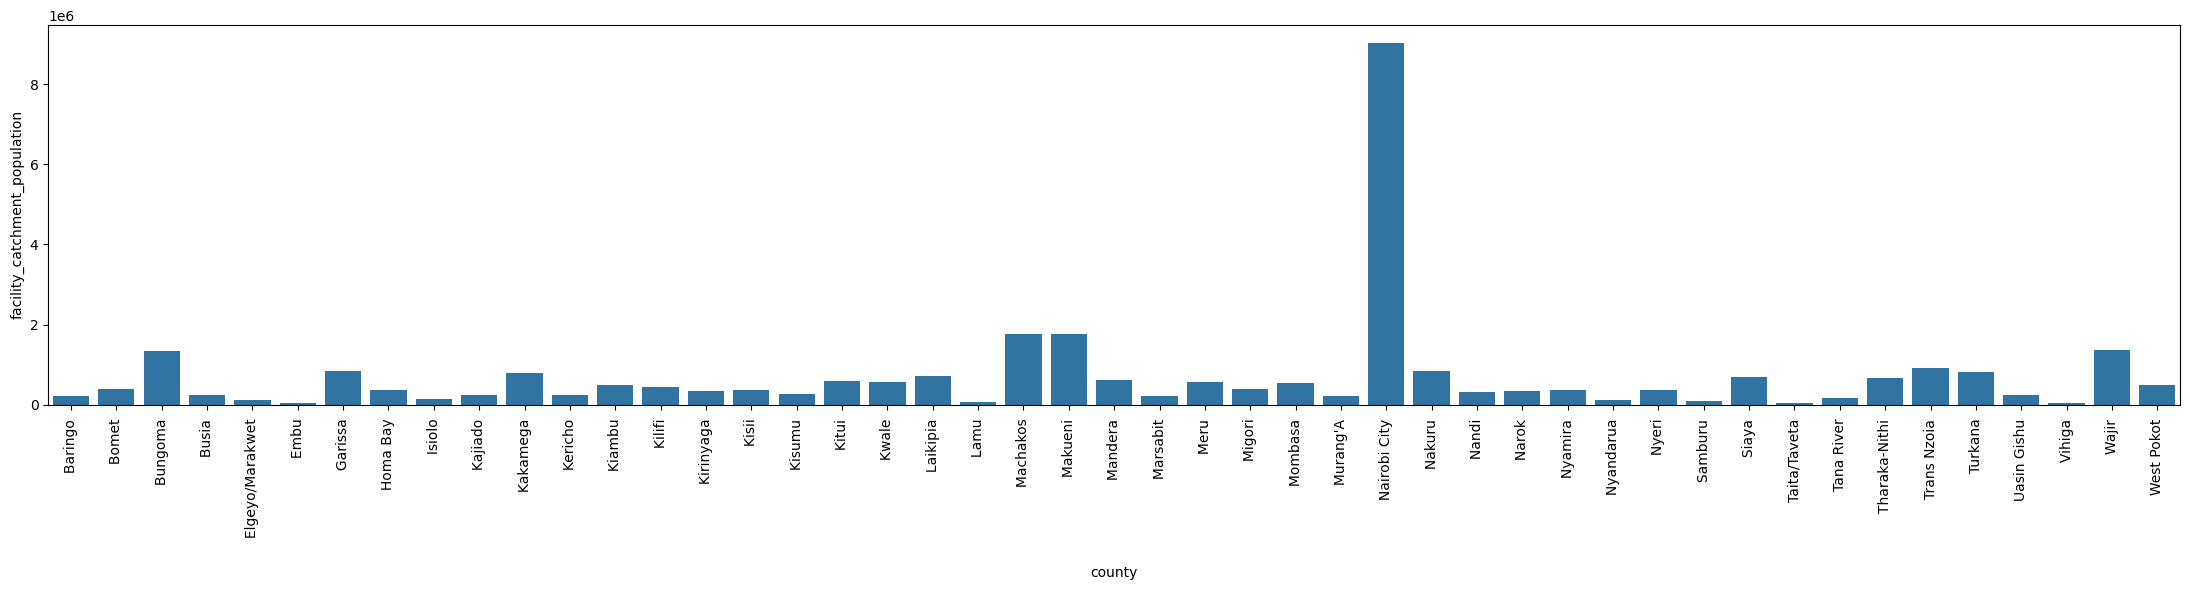

In [46]:
fig,axes=plt.subplots(figsize=(22,6))
sns.barplot(x='county', y='facility_catchment_population', data=final_data)
plt.xticks(rotation=90)  # or rotation=90 for vertical labels
plt.tight_layout()
plt.show()

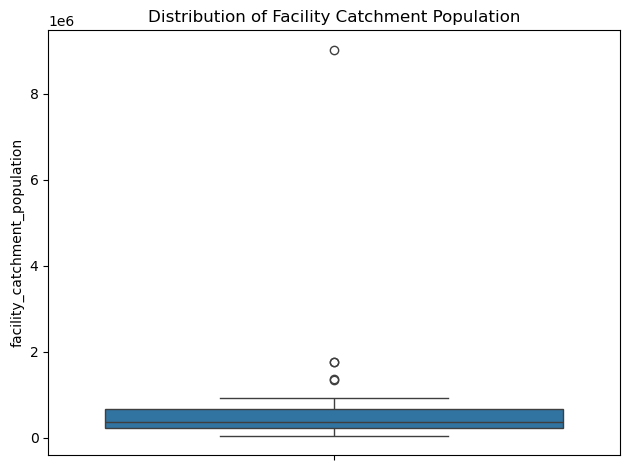

In [47]:
sns.boxplot(y='facility_catchment_population', data=final_data)
plt.title('Distribution of Facility Catchment Population')
plt.tight_layout()
plt.show()


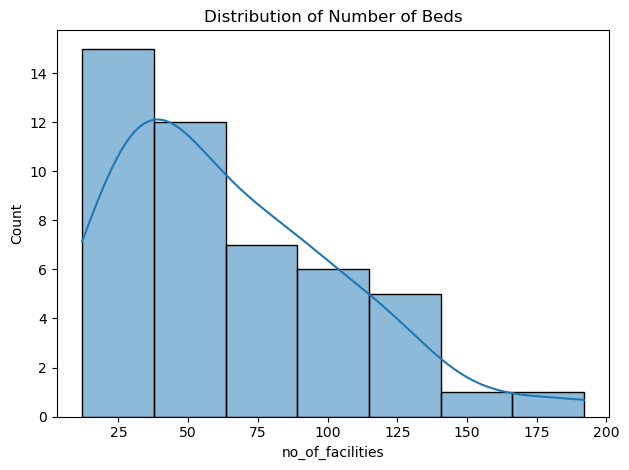

In [48]:
sns.histplot(data=final_data, x='no_of_facilities', kde=True)
plt.title('Distribution of Number of Beds')
plt.tight_layout()
plt.show()


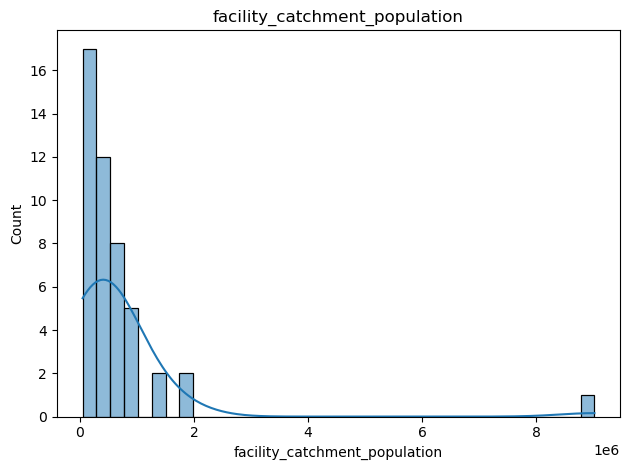

In [49]:
sns.histplot(data=final_data, x='facility_catchment_population', kde=True)
plt.title('facility_catchment_population')
plt.tight_layout()
plt.show()


In [50]:
numeric_df = final_data.select_dtypes(include='number')


In [51]:
corr_matrix = numeric_df.corr()


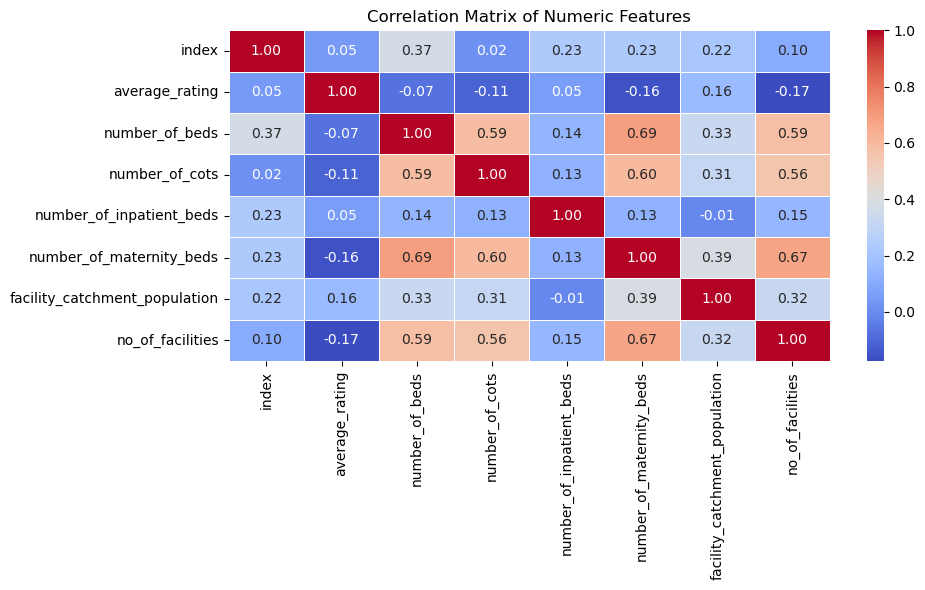

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


In [53]:
final_data.drop(columns=['index'],inplace=True)

In [54]:
final_data.head()

,county,population_total,male,female,total,conventional,group quarters,persons per sq. km,average_rating,number_of_beds,number_of_cots,number_of_inpatient_beds,number_of_maternity_beds,facility_catchment_population,no_of_facilities
0,Baringo,"666,763","336,322","330,428","142,518","141,877",641,61,0.003902,284,16,15,19,204309.0,41
1,Bomet,"875,689","434,287","441,379","187,641","187,230",411,349,0.012987,157,19,12,71,398032.0,77
2,Bungoma,"1,670,570","812,146","858,389","358,796","357,714","1,082",552,0.019748,881,67,295,210,1342280.0,129
3,Busia,"893,681","426,252","467,401","198,152","197,944",208,526,0.012500,523,1,219,83,243454.0,35
4,Elgeyo/Marakwet,"454,480","227,317","227,151","99,861","99,119",742,150,0.050000,237,23,2,67,108943.0,25


In [55]:
#final_data["underserved"].unique()

C:\Users\user\AppData\Local\Temp\ipykernel_3556\971325797.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='beds_per_100k', y='county', data=lowest_beds, ax=axes[0], palette="Reds_r")
C:\Users\user\AppData\Local\Temp\ipykernel_3556\971325797.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='facilities_per_100k', y='county', data=lowest_facilities, ax=axes[1], palette="Blues_r")


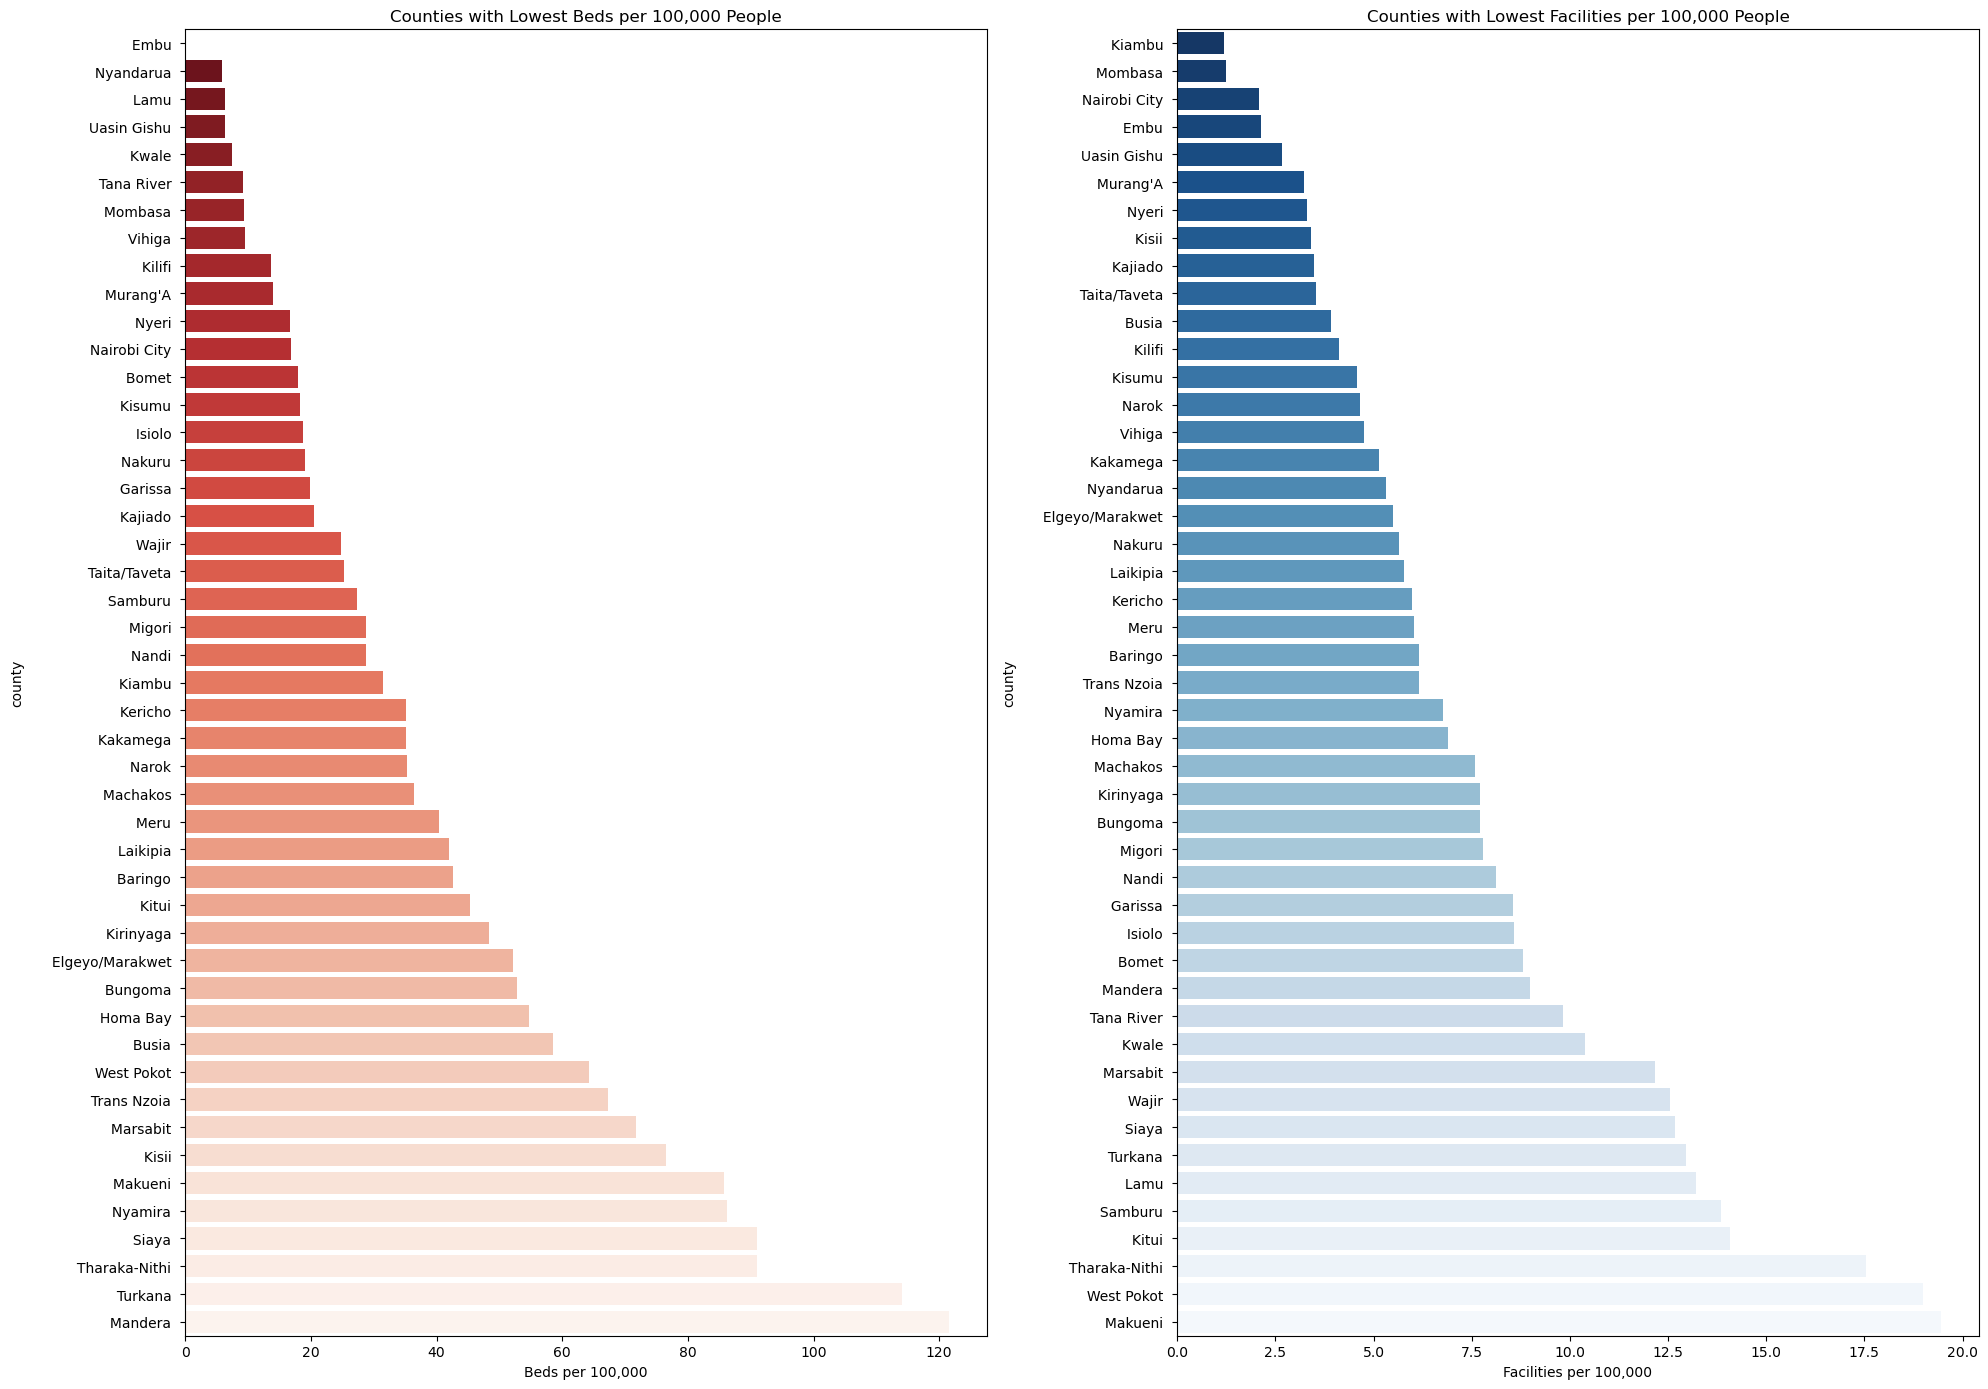

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataframe (if not already in memory)
#df = pd.read_csv("final_data.csv")

# Clean the necessary numeric columns (remove commas)
columns_to_clean = [
    'population_total', 'male', 'female', 'total',
    'conventional', 'group quarters', 'persons per sq. km'
]
for col in columns_to_clean:
    final_data[col] = final_data[col].str.replace(',', '', regex=False)
    final_data[col] = pd.to_numeric(final_data[col], errors='coerce')

# Compute per capita metrics
final_data['beds_per_100k'] = (final_data['number_of_beds'] / final_data['population_total']) * 100000
final_data['facilities_per_100k'] = (final_data['no_of_facilities'] / final_data['population_total']) * 100000

# Sort and get bottom 5 counties
lowest_beds = final_data[['county', 'beds_per_100k']].sort_values(by='beds_per_100k')#.head(5)
lowest_facilities = final_data[['county', 'facilities_per_100k']].sort_values(by='facilities_per_100k')#.head(5)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 14))

sns.barplot(x='beds_per_100k', y='county', data=lowest_beds, ax=axes[0], palette="Reds_r")
axes[0].set_title('Counties with Lowest Beds per 100,000 People')
axes[0].set_xlabel('Beds per 100,000')

sns.barplot(x='facilities_per_100k', y='county', data=lowest_facilities, ax=axes[1], palette="Blues_r")
axes[1].set_title('Counties with Lowest Facilities per 100,000 People')
axes[1].set_xlabel('Facilities per 100,000')

plt.tight_layout()
plt.show()


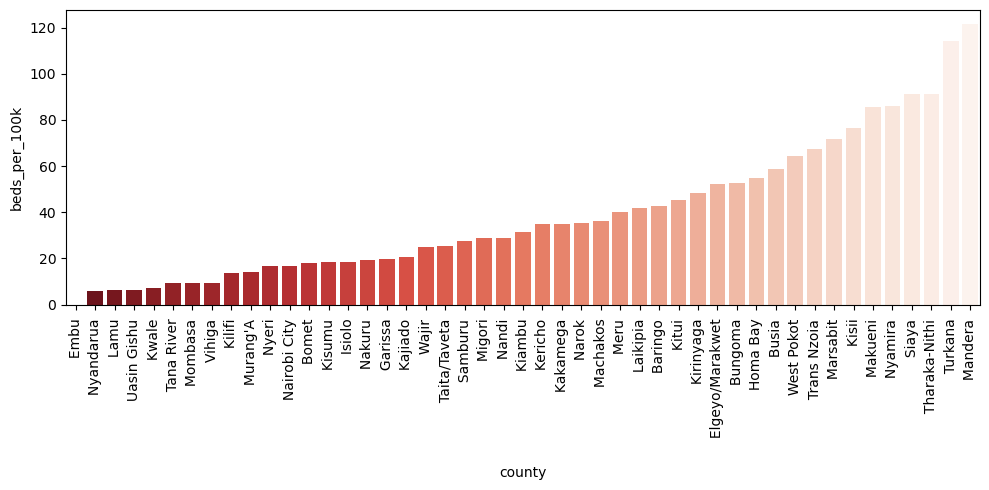

In [78]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    x='county', y='beds_per_100k',
    data=lowest_beds,
    hue='county', palette="Reds_r",
    legend=False
)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Counties like embu, Nyandarua, lamu, Uasin Gishu and kwale have extremely low availability of beds relative to their population.
#### counties like Nairobi ,Mombasa, Embu has the lowest number of facilities per 100,000 people



Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.00      0.00      0.00         2

    accuracy                           0.70        10
   macro avg       0.39      0.44      0.41        10
weighted avg       0.62      0.70      0.66        10



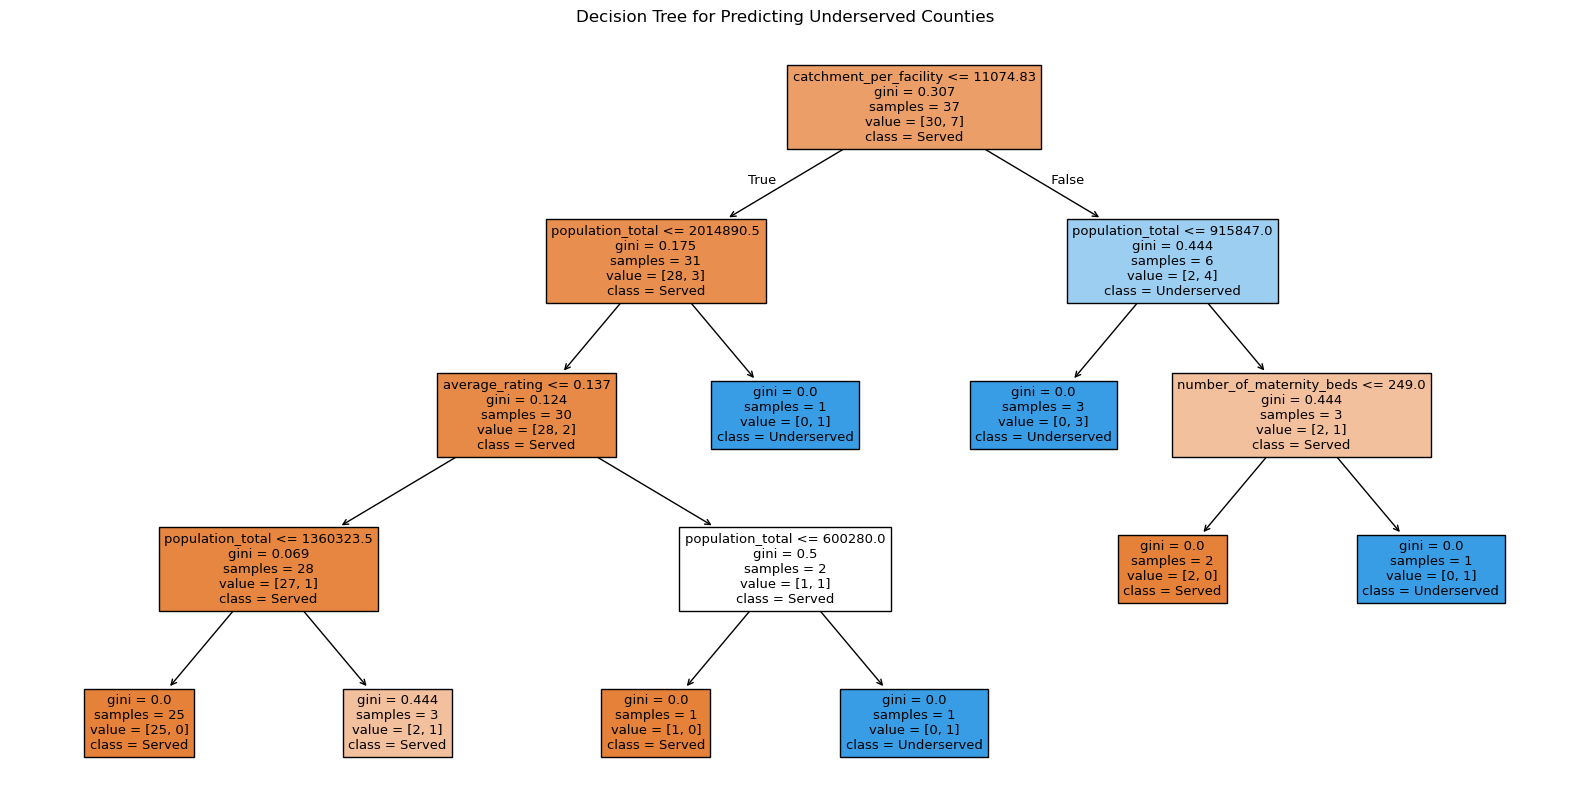

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

# Load and clean
#df = pd.read_csv("final_data.csv")
columns_to_clean = ['population_total', 'male', 'female', 'total', 'conventional', 'group quarters', 'persons per sq. km']
for col in columns_to_clean:
    final_data[col] = final_data[col].astype(str).str.replace(',', '', regex=False)
    final_data[col] = pd.to_numeric(final_data[col], errors='coerce')

# Create new features
final_data['beds_per_100k'] = (final_data['number_of_beds'] / final_data['population_total']) * 100000
final_data['facilities_per_100k'] = (final_data['no_of_facilities'] / final_data['population_total']) * 100000
final_data['catchment_per_facility'] = final_data['facility_catchment_population'] / final_data['no_of_facilities']
final_data['pop_density'] = final_data['persons per sq. km']

# Label underserved counties
beds_median = final_data['beds_per_100k'].median()
catchment_median = final_data['catchment_per_facility'].median()
final_data['underserved'] = ((final_data['beds_per_100k'] < beds_median) & 
                     (final_data['catchment_per_facility'] > catchment_median)).astype(int)

# Prepare features and target
features = ['population_total', 'pop_density', 'number_of_beds', 'number_of_maternity_beds',
            'no_of_facilities', 'catchment_per_facility', 'average_rating']
X = final_data[features]
y = final_data['underserved']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=['Served', 'Underserved'], filled=True)
plt.title("Decision Tree for Predicting Underserved Counties")
plt.show()


In [58]:

import streamlit as st
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

st.title("🧠 Health Facility Access Classifier")

st.markdown("""
This app identifies **underserved counties** based on:
- Population size
- Health facility distribution
- Number of maternity beds
- Average facility rating

It uses a **Decision Tree Classifier** to help health planners make better decisions.
""")

uploaded_file = st.file_uploader("Upload your cleaned county healthcare dataset (.csv)", type="csv")

if uploaded_file is not None:
    final_data = pd.read_csv(uploaded_file)

    st.success("✅ File uploaded successfully!")

    # Show raw data preview
    if st.checkbox("Show raw data"):
        st.dataframe(final_data.head())

    # Define features and target
    features = [
        'catchment_per_facility',
        'population_total',
        'average_rating',
        'number_of_maternity_beds'
    ]

    if 'status_binary' not in final_data.columns:
        st.error("The dataset must include a column named 'status_binary' (0 = Underserved, 1 = Served).")
    else:
        X = final_data[features]
        y = final_data['status_binary']

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train Decision Tree
        clf = DecisionTreeClassifier(max_depth=4, random_state=42)
        clf.fit(X_train, y_train)

        st.subheader("📈 Decision Tree Visualization")
        fig, ax = plt.subplots(figsize=(14, 8))
        plot_tree(clf, feature_names=features, class_names=["Underserved", "Served"], filled=True, rounded=True, fontsize=10)
        st.pyplot(fig)

        st.subheader("📊 Feature Importance")
        importance_df = pd.DataFrame({
            "Feature": features,
            "Importance": clf.feature_importances_
        }).sort_values(by="Importance", ascending=False)
        st.dataframe(importance_df.reset_index(drop=True))
else:
    st.warning("📂 Please upload a `.csv` file to continue.")


2025-07-30 10:57:53.591 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 10:57:55.317 
  command:

    streamlit run C:\Users\user\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-30 10:57:55.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 10:57:55.321 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 10:57:55.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 10:57:55.326 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 10:57:55.328 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-30 10:57:55.330 Thread 'MainThread': mis